In [55]:
%pip install seaborn

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import seaborn as sns

In [57]:
df = pd.read_csv('car data.csv')

In [15]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.shape

(301, 9)

In [17]:
#getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [21]:
#checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
#checking the distribution(1. распределение 2. распространение) of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts()) #transmission(1. коробка передач 2. передача

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [30]:
#encoding "Fuel Type" column
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

#encoding "Seller Type" column
df.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

#encoding "Transmission" column
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)
                             

In [31]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [32]:
#splitting data to train and test
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [38]:
#splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [39]:
#loding the LinearRegression model
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
#model evaluation
#prediction in Training data
trainning_data_prediction = lin_reg.predict(X_train)

In [46]:
# compare predicted mode(X_train) with original data(y_train)
#R squared Error
error_score = metrics.r2_score(y_train, trainning_data_prediction)
print(f'R error_score is: {error_score}')

R error_score is: 0.8799451660493707


Text(0, 0.5, 'Predicted price')

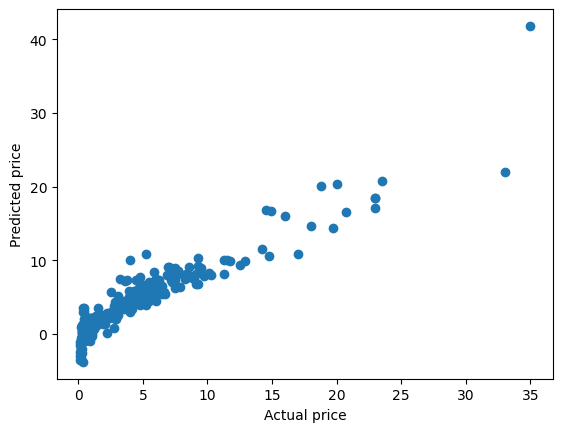

In [63]:
#visualize the actual prices and predicted prices
plt.scatter(y_train, trainning_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [65]:
#doing everything that did fot train is calculation for TEST!!!
test_data_prediction = lin_reg.predict(X_test)
test_error_score = metrics.r2_score(y_test, test_data_prediction)
print(f'test error score: {test_error_score}')

test error score: 0.8365766715025418


Text(0, 0.5, 'Predicted price')

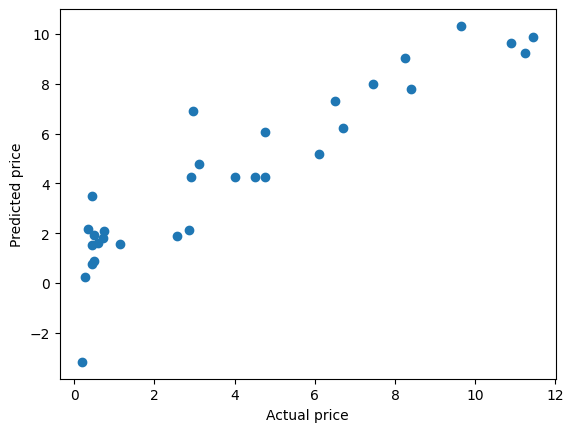

In [67]:
#visualize the actual prices and predicted prices for test
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

In [ ]:
#LASSO Regression

In [68]:
lass_reg_model = Lasso()

In [70]:
lass_reg_model.fit(X_train, y_train)

Lasso()

In [71]:
trainning_data_prediction = lass_reg_model.predict(X_train)
lass_error_score = metrics.r2_score(y_train, trainning_data_prediction)
print(f'Lasso error score: {lass_error_score}')

Lasso error score: 0.8427856123435794


Text(0, 0.5, 'Predicted price')

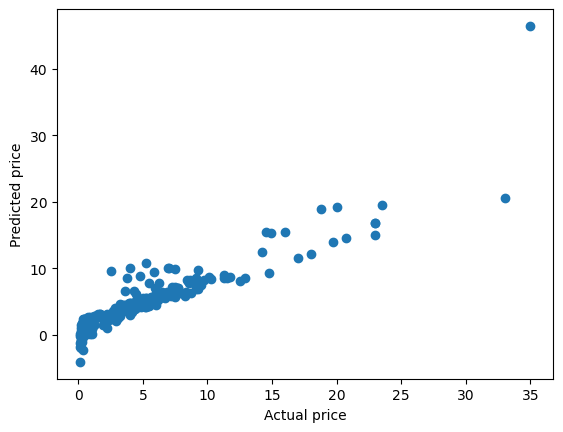

In [73]:
#visualize the actual prices and predicted prices for test
plt.scatter(y_train, trainning_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')

test error score: 0.8709167941173195


Text(0, 0.5, 'Predicted price')

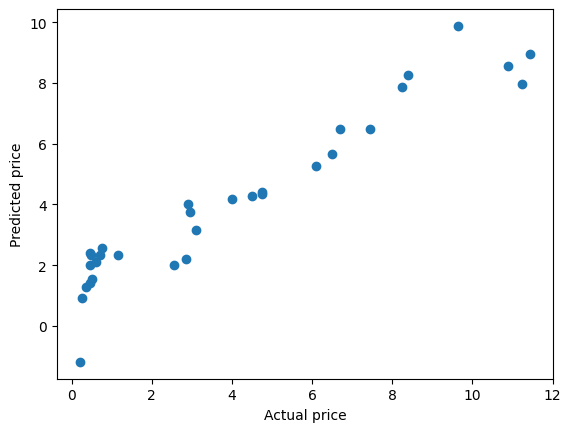

In [75]:
test_data_prediction = lass_reg_model.predict(X_test)
test_error_score = metrics.r2_score(y_test, test_data_prediction)
print(f'test error score: {test_error_score}')
#visualize the actual prices and predicted prices for test
plt.scatter(y_test, test_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')